# Setup and Libraries

In [69]:
## Libraries 
import matplotlib.pyplot as plt
import numpy as np

In [70]:
## Plot Style
plt.style.use("bmh")

In [71]:
## Parameter Values
beta    = discount_factor = 0.9
gamma   = absolute_risk_aversion = 4.0
sigma2  = variance_of_risky_return_shock = 0.16**2
mu      = expected_excess_return = 0.04
w       = initial_wealth = 1.0
rf      = risk_free_gross_return = 1.0
pi      = shock_probabilities = np.array([1/6, 2/3, 1/6])
etas    = shock_uncertainty = np.array([-np.sqrt(3), 0 , np.sqrt(3)])

In [72]:
## Risky Return Variable
R = rf + mu + np.sqrt(sigma2) * etas
expected_R = np.sum(pi * R)
print("Expected Risky Return:", expected_R)

Expected Risky Return: 1.04


# TASK 1

In [73]:
ER = expected_R
variance_R = np.sum(pi * (R - ER)**2)
expected_excess_return = ER - rf
sharpe_ratio_ER = (ER - rf) / np.sqrt(variance_R)

print(
        " E[R] =", ER, "\n",
        "Var(R) =", variance_R, "\n", 
        "Risk Premium = ", round(expected_excess_return,5), "\n", 
        "Sharpe Ratio =", round(sharpe_ratio_ER,5), "\n")

 E[R] = 1.04 
 Var(R) = 0.0256 
 Risk Premium =  0.04 
 Sharpe Ratio = 0.25 



In [74]:
theoretical_ER = rf + mu
theoretical_variance_R = sigma2

print(
    " Theoretical E[R] =", round(theoretical_ER,5), "\n",
    "Theoretical Var(R) =", round(theoretical_variance_R,5))

 Theoretical E[R] = 1.04 
 Theoretical Var(R) = 0.0256


## *The expected return (with rounding) is equal to μ and the variance (with rounding) is equal to σ^2. This means that the approximation using three probability states matches the true mean and variance well. Therefore, it provides a good representation of the risky return.*

## TASK 2

In [75]:
def util(c, gamma):
    return -np.exp(-gamma * c) # CARA

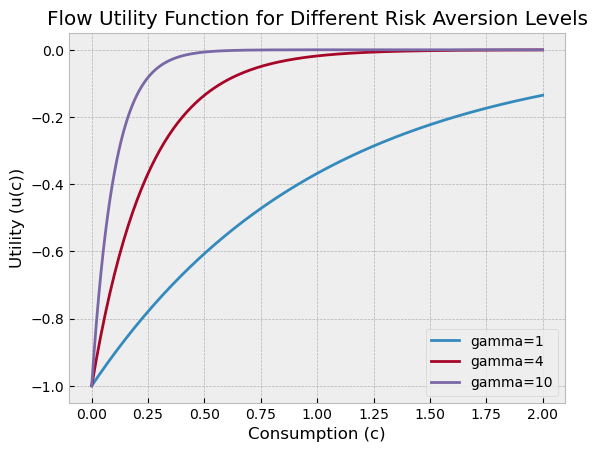

In [76]:
c_values = np.linspace(0, 2, 200)
gamma_values = [1, 4, 10]

## Flow Utility Function - Plot: u(c) for c ∈[0, 2] and gamma ∈{1, 4, 10} 
for g in gamma_values:
    plt.plot(c_values, util(c_values, g), label=f'gamma={g}')

plt.xlabel("Consumption (c)")
plt.ylabel("Utility (u(c))")
plt.title("Flow Utility Function for Different Risk Aversion Levels")
plt.legend()
plt.grid(True)
plt.show()

## *The graph shows how utility changes when consumption increases, for different levels of risk aversion (𝛾). Higher 𝛾 makes the investor more sensitive to risk, and this shows up as a more strongly curved utility function.*

# TASK 3

In [77]:
def expected_util(s, alpha, beta, gamma, sigma2, mu, w, etas, pi):
    c1 = w - s
    u1 = util(c1, gamma)

    R = rf + mu + np.sqrt(sigma2) * etas
    R = R[:, None, None] #R = R[:, None] 
    
    c2 = R * alpha * s + rf * (1-alpha) * s
    u2 = util(c2, gamma)
    E_u2 = np.sum(pi[:, None, None] * u2, axis=0)

    U = u1 + beta * E_u2

    return np.squeeze(U) 

# TASK 4

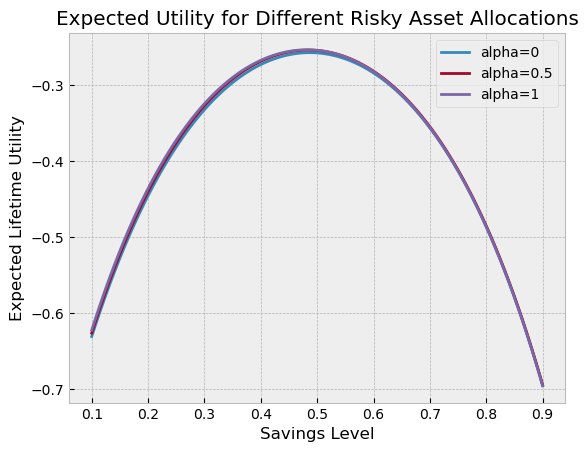

In [78]:
alpha_values= [0, 0.5, 1]
candidate_savings_level = np.linspace(0.1, w-0.1, 200)

## Expected Lifetime Utility - Plot: α∈{0, 0.5, 1} and 200 candidate savings levels (s) ∈[0.1, w−0.1]
for a in alpha_values:
    U_values = expected_util(candidate_savings_level, a, beta, gamma, sigma2, mu, w, etas, pi)
    plt.plot(candidate_savings_level, U_values, label=f'alpha={a}')

plt.xlabel("Savings Level")
plt.ylabel("Expected Lifetime Utility")
plt.title("Expected Utility for Different Risky Asset Allocations")
plt.legend()
plt.grid(True)
plt.show()

## *The graph shows expected lifetime utility as a function of savings s, for different values of the risky share α. The shape of the curves is driven by: 1) Diminishing marginal utility of consumption. 2) Trade-off between present and future consumption. 3) Risk in the second period.*

# TASK 5

In [79]:
def find_optimum(beta, gamma, sigma2, mu, w, etas, pi):
    savings_candidate_grid = np.linspace(10**(-6), w - 10**(-6), 1000)
    alpha_canditate_grid = np.linspace(0, 1, 1000)

    S, A = np.meshgrid(savings_candidate_grid, alpha_canditate_grid, indexing="ij")
    U = expected_util(S, A, beta, gamma, sigma2, mu, w, etas, pi)

    # Finds Maximum
    max_index = np.unravel_index(np.argmax(U), U.shape)

    savings_optimum = S[max_index]
    alpha_optimum = A[max_index] 
    U_max = U[max_index]
    
    return savings_optimum, alpha_optimum, U_max  

# TASK 6

In [87]:
savings_optimum, alpha_optimum, U_max = find_optimum(beta, gamma, sigma2, mu, w, etas, pi)
print("Optimal Savings:", round(savings_optimum,5))
print("Optimal share in Risky Allocation:", round(alpha_optimum,5))
print("Optimal Expected Utility:", round(U_max,5))

Optimal Savings: 0.48248
Optimal share in Risky Allocation: 0.80981
Optimal Expected Utility: -0.2528


## *Interpretation of the Optimal Values:* 
## *Investors saves 48% of initial wealth. Investors allocate 81% of savings in risky asset. Because of the utility functions construction (u(c)), its value does not have a standalone meaning. However, it is the highest attainable expected lifetime utility given the model structure, parameter values and constraints.* 

# TASK 7

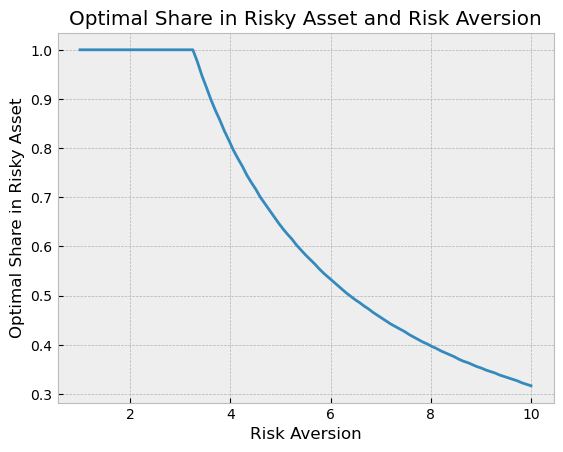

In [81]:
gamma_values = np.linspace(1, 10, 101)
alpha_optimal_values = np.zeros(len(gamma_values))

## Optimal Risky Share for each Value of Risk Averson - Plot: gamma∈[0, 10]
for i, g in enumerate(gamma_values):
    savings_optimum, alpha_optimum, _ = find_optimum(beta, g, sigma2, mu, w, etas, pi)
    alpha_optimal_values[i] = alpha_optimum

plt.plot(gamma_values, alpha_optimal_values)
plt.xlabel("Risk Aversion")
plt.ylabel("Optimal Share in Risky Asset")
plt.title("Optimal Share in Risky Asset and Risk Aversion")
plt.grid(True)
plt.show()

## *The optimal risky share decreases when absolute risk aversion (𝛾) increases. When the investor becomes more risk-averse, they dislike uncertainty more and therefore invest less in the risky asset. Which means that higher risk averason, leads to lower risk-taking.*

# TASK 8

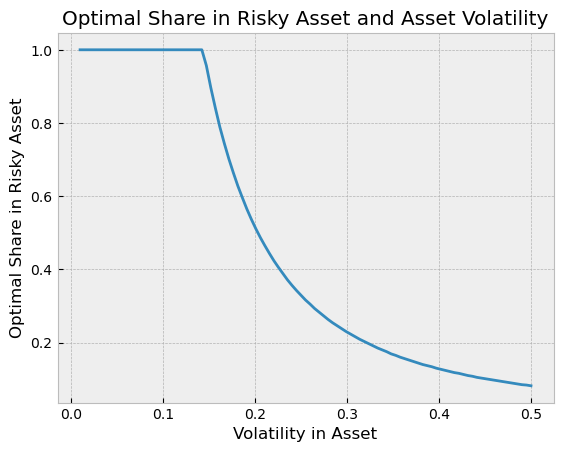

In [86]:
sigma_values = np.linspace(0.01, 0.5, 101)
alpha_optimal_sigma = np.zeros(len(sigma_values))

## Optimal Risky Share for each Value of Volatility - Plot: sigma^2 ∈[0.01, 0.5]
for i, sigma in enumerate(sigma_values):
    savings_optimum, alpha_optimum, _ = find_optimum(beta, gamma, sigma**2, mu, w, etas, pi)
    alpha_optimal_sigma[i] = alpha_optimum

plt.plot(sigma_values, alpha_optimal_sigma)
plt.xlabel("Volatility in Asset")
plt.ylabel("Optimal Share in Risky Asset")
plt.title("Optimal Share in Risky Asset and Asset Volatility")
plt.grid(True)
plt.show()

## *The optimal risky share decreases as 𝜎 increases. Higher volatility leads to lower risky investment. When volatility becomes higher, the risky asset becomes more uncertain. Because the investor is risk-averse, higher volatility makes the risky asset less attractive. As a result, the investor chooses to invest a smaller share in the risky asset.*